In [1]:
import pandas as pd # for data manipulation,data processing, CSV file I/O (e.g. pd.read_csv)
import pandas.io.sql as sqlio # allows manipulation of a Pandas Dataframe using SQL
import psycopg2 as ps # used to perform operations on PostgreSQL using python
import numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for interactive plotting with colors /used for plot interactive graph. I like it most for plot
from sklearn.preprocessing import LabelEncoder # Encode target labels with value between 0 and n_classes-1
from scipy import stats # offers variety of statistic functions
from sklearn.preprocessing import StandardScaler # removes the mean and scales each feature/variable to unit variance.
from sklearn.model_selection import train_test_split # to split arrays or matrices into random train and test subsets
from sklearn import metrics # for evaluating our model
import pickle # Pickle is used for serializing and de-serializing a Python object structure
%matplotlib inline

In [33]:
#Establishing a connection between jupyter otebook and postgresql database 

conn2 = ps.connect(dbname='postgres',
                   user='postgres',
                   password='0112358',
                   host='localhost',
                   port='5432' )

In [34]:
#loading our dataset

sql = """select * from used_car_data"""
df = sqlio.read_sql_query(sql,conn2)

C:\Users\user\AppData\Local\Temp\ipykernel_7384\1332430663.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn2)


In [19]:
df.head()

,index,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,city,state,body_style,engine,drive_train,price
0,0,Mercedes-Benz,GLC,18386,2019,Gas,1.0,0,Automatic,New York,NY,SUV,2.0L Inline-4 Gas Turbocharged,AWD,37906
1,1,Mercedes-Benz,C-Class,41829,2018,Gas,1.0,0,Automatic,New York,NY,Sedan,2.0L Inline-4 Gas Turbocharged,AWD,31901
2,2,Mercedes-Benz,C-Class,22667,2018,Gas,1.0,0,Automatic,New York,NY,Sedan,2.0L Inline-4 Gas Turbocharged,AWD,33906
3,3,Ferrari,612 Scaglietti,15104,2005,Gas,2.0,0,Automatic,New York,NY,Coupe,5.8L V-12 Gas,RWD,110500
4,4,Mercedes-Benz,GLA,33163,2019,Gas,1.0,0,Automatic,New York,NY,SUV,2.0L Inline-4 Gas Turbocharged,AWD,32904


In [20]:
df.drop('index',axis=1,inplace=True)

In [21]:
df.head()

,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,city,state,body_style,engine,drive_train,price
0,Mercedes-Benz,GLC,18386,2019,Gas,1.0,0,Automatic,New York,NY,SUV,2.0L Inline-4 Gas Turbocharged,AWD,37906
1,Mercedes-Benz,C-Class,41829,2018,Gas,1.0,0,Automatic,New York,NY,Sedan,2.0L Inline-4 Gas Turbocharged,AWD,31901
2,Mercedes-Benz,C-Class,22667,2018,Gas,1.0,0,Automatic,New York,NY,Sedan,2.0L Inline-4 Gas Turbocharged,AWD,33906
3,Ferrari,612 Scaglietti,15104,2005,Gas,2.0,0,Automatic,New York,NY,Coupe,5.8L V-12 Gas,RWD,110500
4,Mercedes-Benz,GLA,33163,2019,Gas,1.0,0,Automatic,New York,NY,SUV,2.0L Inline-4 Gas Turbocharged,AWD,32904


In [35]:
df['drive_train'].value_counts()

FWD    3524
AWD    3320
4WD    1970
RWD    1314
Name: drive_train, dtype: int64

In [43]:
df['engine'].value_counts()

34     1435
88     1133
55     1040
94      935
15      632
       ... 
151       1
123       1
142       1
93        1
96        1
Name: engine, Length: 164, dtype: int64

In [11]:
le=LabelEncoder()

In [36]:
df['brand'] = le.fit_transform(df['brand'])
df['model'] = le.fit_transform(df['model'])
df['transmission'] = le.fit_transform(df['transmission'])
df['drive_train']  = le.fit_transform(df['drive_train'])
df['fuel_type']    = le.fit_transform(df['fuel_type'])
df['body_style'] = le.fit_transform(df['body_style'])
df['engine'] = le.fit_transform(df['engine'])
df['state'] = le.fit_transform(df['state'])



In [108]:
df.drop('city',axis=1,inplace=True)

In [109]:
df.head()

,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,state,body_style,engine,drive_train,price
0,32,167,18386,2019,3,1.0,0,0,3,8,34,1,37906
1,32,63,41829,2018,3,1.0,0,0,3,9,34,1,31901
2,32,63,22667,2018,3,1.0,0,0,3,9,34,1,33906
3,12,22,15104,2005,3,2.0,0,0,3,3,141,3,110500
4,32,165,33163,2019,3,1.0,0,0,3,8,34,1,32904


<AxesSubplot: >

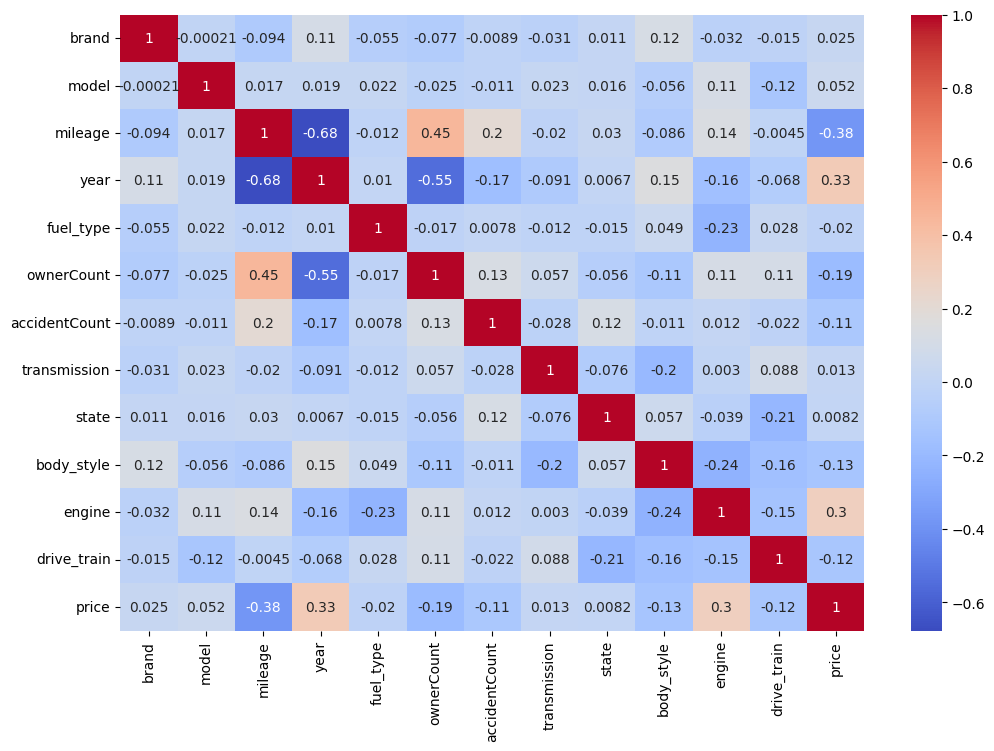

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Figure size 1200x800 with 0 Axes>

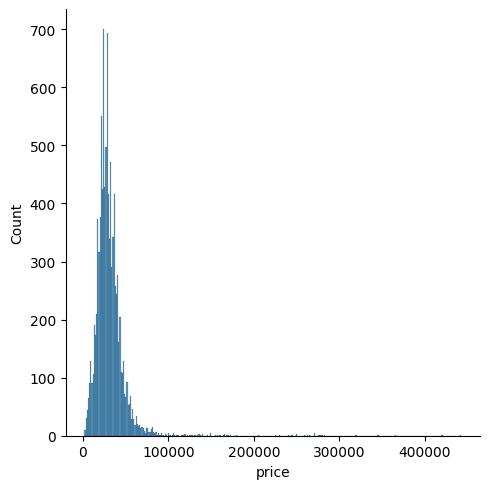

In [111]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

<AxesSubplot: xlabel='price', ylabel='engine'>

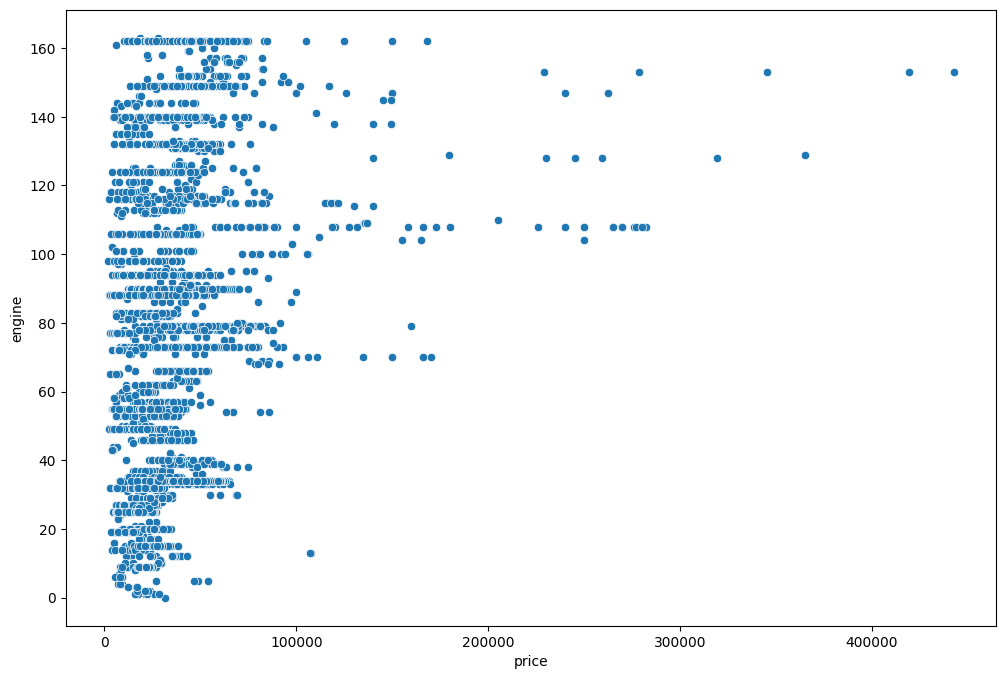

In [112]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='engine',data=df)

<AxesSubplot: xlabel='year'>

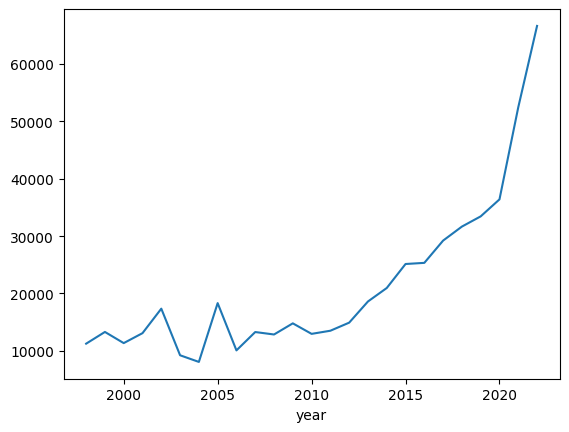

In [113]:
df.groupby('year').mean()['price'].plot()

<AxesSubplot: xlabel='fuel_type', ylabel='price'>

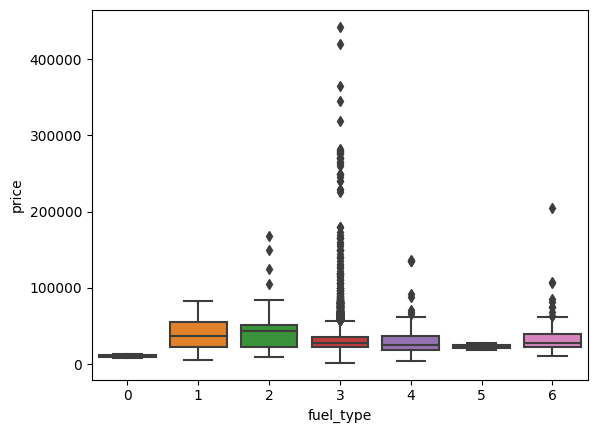

In [114]:
sns.boxplot(df,x = df['fuel_type'], y = df['price'])

In [115]:
df = df[df['price'] < 100000]

In [116]:
df.shape

(10048, 13)

<Figure size 1200x800 with 0 Axes>

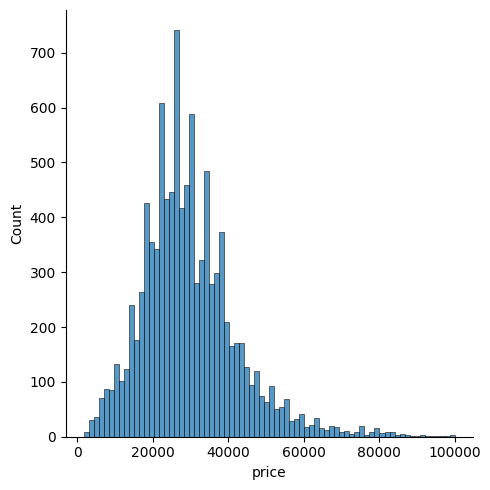

In [117]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

<AxesSubplot: xlabel='price'>

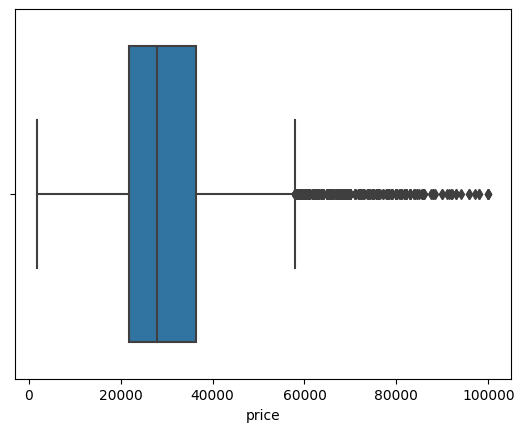

In [118]:
sns.boxplot(df,x = df['price'])

In [119]:
#remove outliers in all the columns

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.shape

(8721, 13)

<AxesSubplot: xlabel='price'>

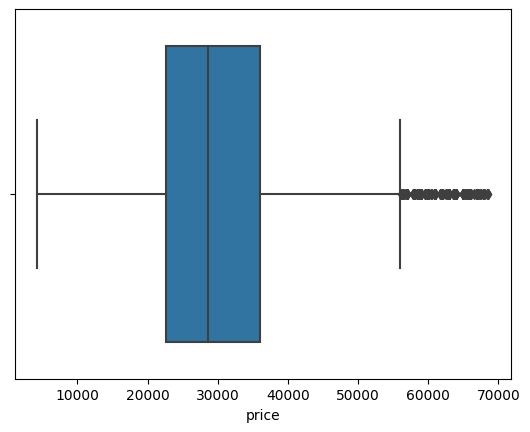

In [120]:
sns.boxplot(df,x = df['price'])

In [121]:
X = df.drop('price',axis=1)
y = df['price']

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [124]:
scaler = MinMaxScaler()

In [125]:
X_train = scaler.fit_transform(X_train)

In [126]:
X_test = scaler.transform(X_test)

In [127]:
len(df.columns)

13

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [129]:
model = Sequential()

In [130]:

model.add(Dense(12,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [131]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=150)

Epoch 1/150
55/55 [==============================] - 1s 4ms/step - loss: 1026639488.0000 - val_loss: 990206464.0000
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 1026374464.0000 - val_loss: 989328512.0000
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 1022378752.0000 - val_loss: 979033536.0000
Epoch 4/150
55/55 [==============================] - 0s 2ms/step - loss: 993916224.0000 - val_loss: 922584768.0000
Epoch 5/150
55/55 [==============================] - 0s 2ms/step - loss: 883595264.0000 - val_loss: 745629248.0000
Epoch 6/150
55/55 [==============================] - 0s 2ms/step - loss: 621908800.0000 - val_loss: 418922144.0000
Epoch 7/150
55/55 [==============================] - 0s 2ms/step - loss: 290395744.0000 - val_loss: 166339360.0000
Epoch 8/150
55/55 [==============================] - 0s 2ms/step - loss: 147113408.0000 - val_loss: 135549552.0000
Epoch 9/150
55/55 [==============================] - 0s 2ms/step - loss: 1360

55/55 [==============================] - 0s 5ms/step - loss: 57490028.0000 - val_loss: 51712824.0000
Epoch 144/150
55/55 [==============================] - 0s 4ms/step - loss: 57509264.0000 - val_loss: 52010556.0000
Epoch 145/150
55/55 [==============================] - 0s 4ms/step - loss: 57566352.0000 - val_loss: 51828992.0000
Epoch 146/150
55/55 [==============================] - 0s 3ms/step - loss: 57491116.0000 - val_loss: 51653540.0000
Epoch 147/150
55/55 [==============================] - 0s 2ms/step - loss: 57500628.0000 - val_loss: 51568980.0000
Epoch 148/150
55/55 [==============================] - 0s 3ms/step - loss: 57575448.0000 - val_loss: 51547824.0000
Epoch 149/150
55/55 [==============================] - 0s 2ms/step - loss: 57571868.0000 - val_loss: 51644676.0000
Epoch 150/150
55/55 [==============================] - 0s 2ms/step - loss: 57550656.0000 - val_loss: 51598164.0000


In [132]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

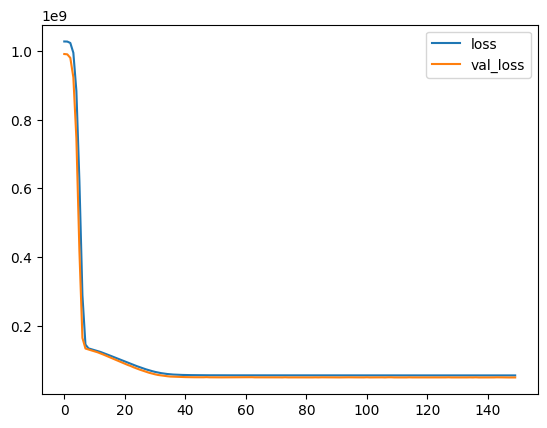

In [133]:
losses.plot()

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [135]:
predictions = model.predict(X_test)

55/55 [==============================] - 0s 1ms/step


In [136]:
mean_absolute_error(y_test,predictions)

5354.9312681881265

In [144]:
df.describe()

,brand,model,mileage,year,fuel_type,ownerCount,accidentCount,transmission,state,body_style,engine,drive_train,price
count,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.0,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000
mean,23.800596,197.070634,43977.786722,2018.012843,2.998968,1.382066,0.119252,0.0,1.358216,7.905057,64.322555,1.380576,30053.984520
std,13.466933,122.658346,29088.401187,2.021120,0.191263,0.602647,0.324104,0.0,1.448858,1.288329,36.799094,0.914578,10776.568217
min,0.000000,1.000000,17.000000,2010.000000,2.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,4295.000000
25%,13.000000,89.000000,23208.000000,2017.000000,3.000000,1.000000,0.000000,0.0,0.000000,8.000000,34.000000,1.000000,22597.000000
50%,21.000000,170.000000,37116.000000,2019.000000,3.000000,1.000000,0.000000,0.0,0.000000,8.000000,55.000000,1.000000,28600.000000
75%,35.000000,305.000000,57518.000000,2019.000000,3.000000,2.000000,0.000000,0.0,3.000000,9.000000,88.000000,2.000000,36000.000000
max,46.000000,443.000000,154599.000000,2022.000000,4.000000,3.000000,1.000000,0.0,4.000000,10.000000,162.000000,3.000000,68549.000000


In [ ]:
#We are about 16% off

In [137]:
explained_variance_score(y_test,predictions)

0.5426849037486652

In [138]:
np.sqrt(mean_squared_error(y_test,predictions))

7183.186078004463

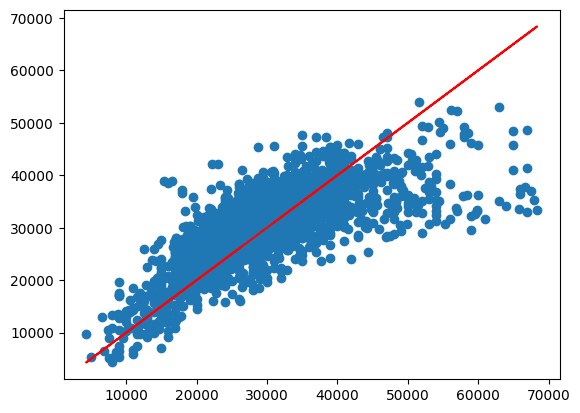

In [139]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [140]:
from sklearn.metrics import classification_report,confusion_matrix

In [141]:
df['price'].mean()

30053.98452012384